In [5]:
import warnings
warnings.filterwarnings('ignore')

# import pandas as pd
# import ray
# ray.init(num_cpus=4)
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import gc

from utils.schemas import *
from utils.functions import *

In [2]:
data_folder = 'input'

In [3]:
train = pd.read_csv(data_folder+'/train_generated_1.csv', dtype = schema_generated_1)#.sort_values('TransactionDT')
test = pd.read_csv(data_folder+'/test_generated_1.csv', dtype = schema_generated_1)#.sort_values('TransactionDT')

In [4]:
train.shape, test.shape

((590540, 558), (506691, 558))

In [6]:
train_index = train.shape[0]
test_index = test.shape[0]
df = pd.concat([train, test], axis=0)
df.shape

(1097231, 558)

In [7]:
old_cols = df.columns

In [8]:
del train
del test
gc.collect()

7

In [9]:
id_cols = ['addr1', 'addr2', 'card1', 'P_emaildomain']

In [10]:
df.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,id_38_fe2,R_emaildomain_0_fe2,device_version_fe2,device_name_fe2,P_emaildomain_0_fe2,P_emaildomain_1_fe2,proc_id_30_0_fe2,proc_id_30_1_fe2,R_emaildomain_1_fe2,proc_id_31_0_fe2
0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,2,1,0,0,0,0
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,8,0,0,0,0,0
3,2.0,0.0,1.0,0.0,25.0,1.0,5.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,2,0,2,3,0,0,7,4,0,8


In [17]:
gc.collect()

0

In [18]:
def plot_col(col):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    ax.plot(df[df.isFraud == 0].TransactionDT, df[df.isFraud == 0][col])
    ax.plot(df[df.isFraud == 1].TransactionDT, df[df.isFraud == 1][col])
    
    ax.plot(df[df.isFraud.isna()].TransactionDT, df[df.isFraud.isna()][col])
    ax.plot(df[df.isFraud.isna()].TransactionDT, df[df.isFraud.isna()][col])
    plt.show()
    gc.collect()

In [11]:
df['Transaction_day_of_week'] = np.floor((df['TransactionDT'] / (3600 * 24) - 1) % 7)
df['Transaction_hour'] = np.floor(df['TransactionDT'] / 3600) % 24

In [12]:
cols1 = [x for x in df.columns if 'card' in x and 'fe' not in x]
df['N1'] = df.groupby(cols1)['TransactionDT'].transform('count').astype(np.uint32)

In [13]:
cols1 = [x for x in df.columns if 'addr' in x]
df['N2'] = df.groupby(cols1)['TransactionDT'].transform('count').astype(np.uint32)

In [14]:
cols1 = [x for x in df.columns if 'C' in x and 'Product' not in x]
df['N3'] = df.groupby(cols1)['TransactionDT'].transform('count').fillna(df.groupby(cols1)['TransactionDT'].transform('count').isna().sum()).astype(np.uint32)

In [15]:
cols1 = [x for x in df.columns if 'mail' in x]
df['N4'] = df.groupby(cols1)['TransactionDT'].transform('count').astype(np.uint32)

In [16]:
cols1 = ['P_emaildomain', 'R_emaildomain', 'addr1']
df['N5'] = df.groupby(cols1)['TransactionDT'].transform('count').astype(np.uint32)

In [17]:
cols1 = ['P_emaildomain', 'R_emaildomain', 'addr1', 'card1']
df['N6'] = df.groupby(cols1)['TransactionDT'].transform('count').astype(np.uint32)

In [29]:
cols1 = ['addr1', 'addr2', 'card1', 'P_emaildomain']
df['N7'] = df.groupby(cols1)['TransactionDT'].transform('count').astype(np.uint16)

#### V columns

In [53]:
# groups V
cols1 = ['V{}'.format(x) for x in range(1,12)]
cols2 = ['V{}'.format(x) for x in range(12,35)]
cols3 = ['V{}'.format(x) for x in range(35,53)]
cols4 = ['V{}'.format(x) for x in range(53,75)]
cols5 = ['V{}'.format(x) for x in range(75,95)]
cols6 = ['V{}'.format(x) for x in range(95,138)]
cols7 = ['V{}'.format(x) for x in range(138,167)]
cols8 = ['V{}'.format(x) for x in range(167,217)]
cols9 = ['V{}'.format(x) for x in range(217,279)]
cols10 = ['V{}'.format(x) for x in range(279,322)]
cols11 = ['V{}'.format(x) for x in range(322,340)]

In [54]:
# Binary V
bin_v = ['V1', 'V14', 'V41', 'V65', 'V88', 'V107', 'V305']

In [55]:
df['N8'] = df.groupby(cols1)['TransactionDT'].transform('count')
df['N9'] = df.groupby(cols2)['TransactionDT'].transform('count')
df['N10'] = df.groupby(cols3)['TransactionDT'].transform('count')
df['N11'] = df.groupby(cols4)['TransactionDT'].transform('count')
df['N12'] = df.groupby(cols5)['TransactionDT'].transform('count')
df['N13'] = df.groupby(cols6)['TransactionDT'].transform('count')
df['N14'] = df.groupby(cols7)['TransactionDT'].transform('count')
df['N15'] = df.groupby(cols8)['TransactionDT'].transform('count')
df['N16'] = df.groupby(cols9)['TransactionDT'].transform('count')
df['N17'] = df.groupby(cols10)['TransactionDT'].transform('count')
df['N18'] = df.groupby(cols11)['TransactionDT'].transform('count')
df['N19'] = df.groupby(bin_v)['TransactionDT'].transform('count')
gc.collect()

0

In [70]:
df.V14

0         1.0
1         1.0
2         1.0
3         1.0
4         NaN
         ... 
506686    1.0
506687    1.0
506688    1.0
506689    1.0
506690    1.0
Name: V14, Length: 1097231, dtype: float16

In [68]:
df.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19
0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,225048.0,42088.0,142.0,NaN,NaN,NaN,46.0,NaN,NaN
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,79639.0,64087.0,77715.0,674969.0,NaN,NaN,NaN,261168.0,NaN,NaN
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,214173.0,225048.0,198236.0,674969.0,NaN,NaN,NaN,261168.0,NaN,534000.0
3,2.0,0.0,1.0,0.0,25.0,1.0,5.0,0.0,0.0,0.0,...,214173.0,225048.0,198236.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,674969.0,1.0,182689.0,137708.0,176639.0,118260.0,NaN


KMeans

In [32]:
# from sklearn.cluster import KMeans

In [33]:
# n_cls = [2, 4, 8, 16, 32, 64]

In [34]:
# cols1 = [x for x in df.columns if 'C' in x and 'Product' not in x]
# cols2 = [x for x in df.columns if 'card' in x and 'fe' not in x]
# cols3 = [x for x in df.columns if 'V' in x]

# cols_group = [cols1, cols2, cols3]

In [35]:
# for n in n_cls:
#     m = 1
#     for cols in cols_group:
#         print('Generation feature:\tgroup_{0}_n_{1}'.format(m, n))
#         kmeans = KMeans(n_clusters=n, random_state=42).fit(df[cols].fillna(-1))
#         df['group_{0}_n_{1}'.format(m, n)] = kmeans.labels_
#         m += 1

New features

In [122]:
# df['R28'] = np.log1p(df.TransactionAmt - df.groupby(id_cols)['TransactionAmt'].shift(1))

df['R29'] = df.TransactionDT - df.groupby(id_cols)['TransactionDT'].shift(1)

In [130]:
df.groupby(id_cols)['TransactionDT'].shift(1)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
506686    34188341.0
506687    34214271.0
506688    33513008.0
506689           NaN
506690    29374265.0
Name: TransactionDT, Length: 1097231, dtype: float64

In [133]:
df['R29']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
506686      25938.0
506687         16.0
506688     701318.0
506689          NaN
506690    4840080.0
Name: R29, Length: 1097231, dtype: float64

In [129]:
np.std(df['R29'], axis=0)

3317455.033406168

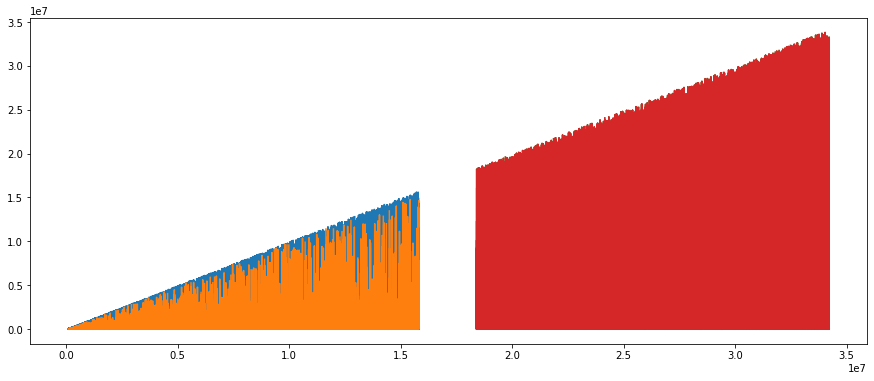

In [123]:
plot_col('R29')

In [81]:
slope = (df.R29.max() - df.R29.min())/(df.TransactionDT.max()-df.TransactionDT.min())
slope

0.9906517664629382

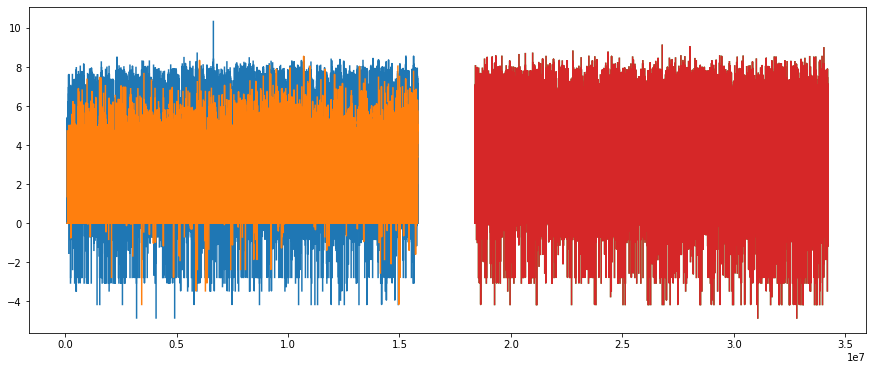

In [80]:
plot_col('R28')

In [92]:
df['R30'] = df.groupby(id_cols)['TransactionDT'].transform('mean')

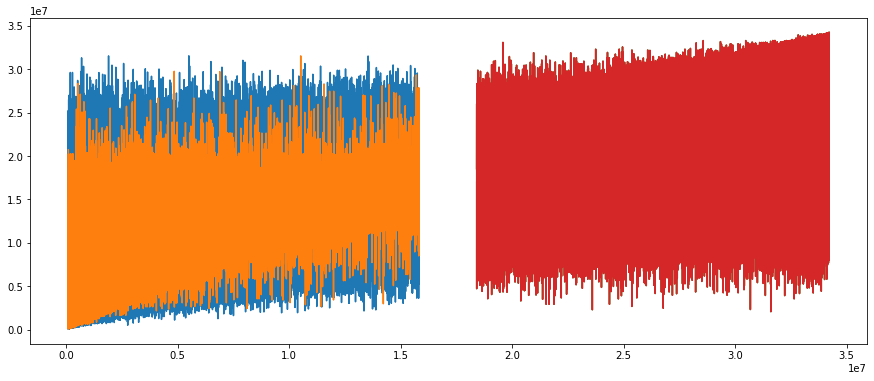

In [93]:
plot_col('R30')

In [111]:
df['R31'] = df.groupby(cols6)['TransactionDT'].transform('std')
df['R31'] = (df['R31']/df['R31'].max()).astype(np.float16)

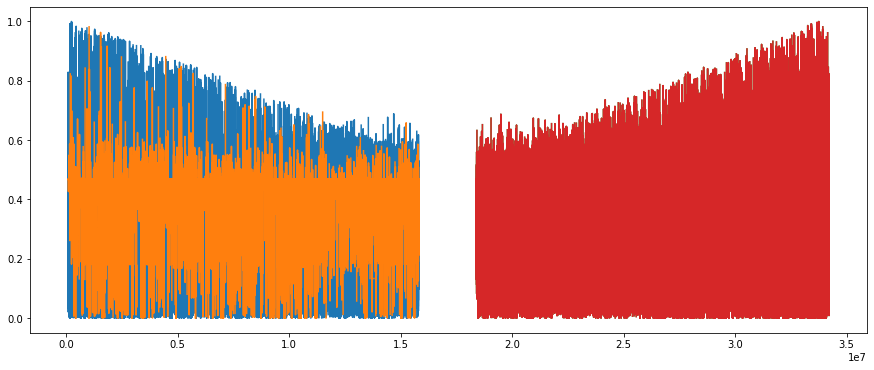

In [112]:
plot_col('R31')

In [131]:
df['R22'] = df.D5 / df.groupby(id_cols)['D5'].transform('std')

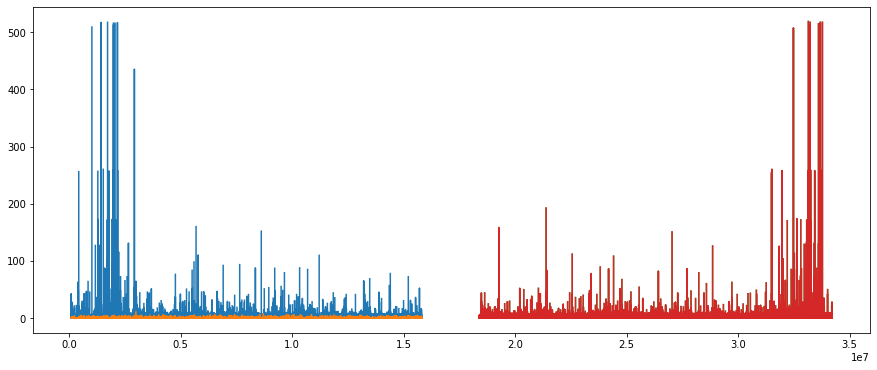

In [132]:
plot_col('R22')

In [19]:
df['R1'] = np.log1p(df.C13/df.C1)

df['R2'] = np.log1p(df.D1/df.D15)

df['R3'] = np.log1p(df.TransactionAmt/df.TransactionAmt.values.mean())

df['R4'] = np.log1p(df.N3/df.N1)

df['R5'] = df['D15'] / df.groupby(['card1', 'addr1'])['D15'].transform('std')

df['R6'] = df['D15'] / df.groupby(['TransactionDT'])['D15'].transform('std')

df['R7'] = df.TransactionAmt / df.Transaction_hour / df.Transaction_day_of_week

df['R8'] = df['TransactionAmt'] / df.groupby(['card1', 'addr1'])['TransactionAmt'].transform('std')

df['R9'] = df['TransactionAmt'] / df.groupby(['card1','C13','C1','card2','addr1'])['TransactionAmt'].transform('std')

df['R10'] = df['TransactionAmt'] / df.groupby(['card1','addr1','id_01','V258','D1', 'P_emaildomain', 'R_emaildomain'])['TransactionAmt'].transform('std')

df['R11'] = df['TransactionAmt'] / df.groupby(['card1','addr1','P_emaildomain', 'R_emaildomain'])['TransactionAmt'].transform('std')

df['R12'] = df.groupby(['card1','addr1'])['card1'].transform('mean') * df.groupby(['card1','addr1'])['card1'].transform('count')

df['R13'] = df.TransactionAmt / df.groupby(['card1', 'card2','addr1'])['TransactionAmt'].transform('std')

df['R14'] = df.C2 / df.groupby(['card1', 'V258', 'D10'])['C2'].transform('mean')

df['R15'] = df.V130 / df.groupby(['addr1', 'card1', 'C10', 'Transaction_hour', 'Transaction_day_of_week'])['V130'].transform('std')

df['R16'] = df.V258 / df.groupby(['addr1', 'card1', 'C10', 'Transaction_hour', 'Transaction_day_of_week'])['V258'].transform('std')

df['R17'] = df.D10 / df.groupby(id_cols)['D10'].transform('std')

df['R18'] = df.D11 / df.groupby(id_cols)['D11'].transform('std')

df['R19'] = df.D15 / df.groupby(id_cols)['D15'].transform('std')

df['R20'] = df.D3 / df.groupby(id_cols)['D3'].transform('std')

df['R21'] = df.D4 / df.groupby(id_cols)['D4'].transform('std')

df['R22'] = df.D5 / df.groupby(id_cols)['D5'].transform('std')

df['R23'] = df.D6 / df.groupby(id_cols)['D6'].transform('std')

df['R24'] = df.D7 * df.groupby(id_cols)['D7'].transform('std')
df['R24'] = df['R24'].replace(np.inf, np.nan)
df['R24'] = df['R24']/df['R24'].max()

df['R25'] = df.D12 * df.groupby(id_cols)['D12'].transform('std')
df['R25'] = df['R25'].replace(np.inf, np.nan)
df['R25'] = df['R25']/df['R25'].max()

df['R26'] = df.D6 * df.groupby(id_cols)['D6'].transform('std')
df['R26'] = df['R26'].replace(np.inf, np.nan)
df['R26'] = df['R26']/df['R26'].max()

df['R27'] = df.D8 * df.groupby(id_cols)['D8'].transform('std')
df['R27'] = df['R27'].replace(np.inf, np.nan)
df['R27'] = df['R27']/df['R27'].max()

df['R28'] = df.TransactionAmt - df.groupby(id_cols)['TransactionAmt'].shift(1)

df['R29'] = np.log1p(df.TransactionDT - df.groupby(id_cols)['TransactionDT'].shift(1))

In [5]:
# train = pd.read_csv(data_folder+'/train_ft_eng_0.csv', dtype = schema_generated_0)
# test = pd.read_csv(data_folder+'/test_ft_eng_0.csv', dtype = schema_generated_0)

In [59]:
dict(df.dtypes)

{'C1': dtype('float16'),
 'C10': dtype('float16'),
 'C11': dtype('float16'),
 'C12': dtype('float16'),
 'C13': dtype('float16'),
 'C14': dtype('float16'),
 'C2': dtype('float16'),
 'C3': dtype('float16'),
 'C4': dtype('float16'),
 'C5': dtype('float16'),
 'C6': dtype('float16'),
 'C7': dtype('float16'),
 'C8': dtype('float16'),
 'C9': dtype('float16'),
 'D1': dtype('float16'),
 'D10': dtype('float16'),
 'D11': dtype('float16'),
 'D12': dtype('float16'),
 'D13': dtype('float16'),
 'D14': dtype('float16'),
 'D15': dtype('float16'),
 'D2': dtype('float16'),
 'D3': dtype('float16'),
 'D4': dtype('float16'),
 'D5': dtype('float16'),
 'D6': dtype('float16'),
 'D7': dtype('float16'),
 'D8': dtype('float16'),
 'D9': dtype('float16'),
 'DeviceInfo': dtype('uint16'),
 'DeviceType': dtype('uint8'),
 'M1': dtype('uint8'),
 'M2': dtype('uint8'),
 'M3': dtype('uint8'),
 'M4': dtype('uint8'),
 'M5': dtype('uint8'),
 'M6': dtype('uint8'),
 'M7': dtype('uint8'),
 'M8': dtype('uint8'),
 'M9': dtype('uin

In [63]:
df.shape

(1097231, 595)

In [64]:
drop_cols = ['D10', 'D11', 'D12', 'D15', 'D3', 'D4',
            'D5', 'D6', 'D7', 'D8']

In [65]:
df = df[[x for x in df.columns if x not in drop_cols]]

In [66]:
df.shape

(1097231, 585)

In [67]:
df = df.replace(np.inf, np.nan)

In [69]:
train = df.iloc[:train_index, :]
test = df.iloc[train_index:, :]

In [70]:
train.to_csv(data_folder+'/train_ft_eng_2.csv', header=True, index=None, compression='zip')
print('train guardado')
test.to_csv(data_folder+'/test_ft_eng_2.csv', header=True, index=None, compression='zip')
print('test guardado')

train guardado
test guardado


In [71]:
train.shape, test.shape

((590540, 585), (506691, 585))

In [72]:
train.head()

,C1,C10,C11,C12,C13,C14,C2,C3,C4,C5,...,R20,R21,R22,R23,R24,R25,R26,R27,R28,R29
0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,0.0,1.0,0.0,25.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.483887,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
